## ILAS Sheet 03
### Task - 02 (i)

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree as SkT
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score
# from sklearn import metrics
import graphviz
from graphviz import Source
training_data = pd.read_csv('gene_expression_training.csv')
training_data

,DYRK1A,ITSN1,BDNF,NR1,NR2A,pAKT,pBRAF,pCAMKII,pCREB,pELK,...,pCASP9,PSD95,SNCA,Ubiquitin,pGSK3B_Tyr216,SHH,pS6,SYP,CaNA,class_label
0,0.4254,0.5871,0.2420,1.7409,2.4890,0.1731,0.1590,1.7871,0.1676,1.1867,...,1.1638,1.6960,0.1715,1.0697,0.7593,0.2197,0.0952,0.3060,1.0708,1.0
1,0.2697,0.4081,0.3172,2.1387,3.0450,0.3144,0.2250,5.3216,0.2259,1.3475,...,1.9258,2.5977,0.2189,1.4788,0.8603,0.2476,0.1218,0.4842,1.0493,0.0
2,0.4379,0.7053,0.4180,2.7968,5.4608,0.2799,0.1908,6.4558,0.2835,1.4171,...,1.7261,2.3924,0.1674,1.5111,0.9010,0.2419,0.1490,0.4751,1.1946,1.0
3,0.3113,0.5176,0.3301,2.2512,3.0812,0.2979,0.2381,2.5866,0.2461,1.4128,...,1.7638,2.4122,0.1973,1.3000,1.0035,0.3391,0.1375,0.4749,1.3008,0.0
4,0.2997,0.4240,0.3096,2.2227,3.2197,0.2581,0.1909,3.2381,0.1835,1.2805,...,1.4972,2.0995,0.1987,1.2607,0.7635,0.2587,0.1304,0.3656,0.9937,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,0.3897,0.6478,0.3979,2.7554,4.8809,0.1250,0.1236,2.8995,0.2106,1.1270,...,1.7389,2.1460,0.1667,1.0189,0.8212,0.2147,0.1203,0.5265,1.7460,0.0
697,0.2977,0.5183,0.3338,2.9898,5.3477,0.2255,0.1745,3.4224,0.2219,1.1980,...,1.8033,2.6451,0.1601,1.2739,0.8710,0.2649,0.1308,0.5113,1.1011,0.0
698,0.7624,1.0255,0.3945,2.9536,4.8204,0.2451,0.1863,3.8375,0.2436,2.0044,...,2.0448,2.4599,0.1516,1.2798,1.0501,0.2398,0.1326,0.5085,1.6338,0.0
699,0.2287,0.3952,0.2341,1.7332,2.2209,0.2207,0.1614,1.9897,0.1852,0.8843,...,1.4375,2.5445,0.1797,1.2422,0.9766,0.2908,0.1189,0.4221,1.4308,1.0


In [ ]:
test_data = pd.read_csv('gene_expression_test.csv')
test_data

,DYRK1A,ITSN1,BDNF,NR1,NR2A,pAKT,pBRAF,pCAMKII,pCREB,pELK,...,pCASP9,PSD95,SNCA,Ubiquitin,pGSK3B_Tyr216,SHH,pS6,SYP,CaNA,class_label
0,1.7179,1.6997,0.3460,2.4480,4.3424,0.2180,0.1786,2.7550,0.1957,3.2620,...,1.1691,2.0558,0.1541,1.0705,1.0572,0.1852,0.1017,0.4638,1.9633,0.0
1,0.6496,0.7290,0.3169,2.4863,3.8667,0.2009,0.1862,2.5293,0.2129,1.4947,...,1.3029,2.2969,0.1223,0.9561,0.8783,0.2114,0.1061,0.3853,1.6332,1.0
2,0.5812,0.8054,0.2953,2.3223,4.1499,0.1736,0.1413,2.0528,0.1897,1.5773,...,1.7635,2.1596,0.1647,1.0180,0.8512,0.1984,0.1165,0.4015,1.4761,1.0
3,0.3445,0.5524,0.3170,2.3556,4.0243,0.2322,0.1823,4.8937,0.2189,1.2365,...,1.6786,2.2521,0.1385,1.2226,0.8514,0.1964,0.1066,0.4954,1.1608,1.0
4,0.6513,0.9620,0.4650,2.9927,5.9750,0.2028,0.1885,1.8078,0.2590,1.9607,...,1.7639,2.2158,0.1626,1.0661,0.8384,0.2223,0.1477,0.5260,1.6390,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.3269,0.4787,0.3155,2.6112,4.2427,0.2382,0.1764,4.0650,0.2011,1.4596,...,1.4978,2.1443,0.1837,1.3041,0.8099,0.2436,0.1378,0.4276,0.8900,0.0
342,0.2984,0.5105,0.3421,2.6379,4.5064,0.2319,0.2128,3.4308,0.2352,1.2672,...,1.4277,2.2099,0.1537,1.1905,0.7592,0.2183,0.1257,0.5421,1.2958,0.0
343,0.3255,0.5591,0.2918,2.4593,4.8114,0.2165,0.1672,6.3069,0.2014,1.2508,...,1.8001,2.5237,0.1514,1.3582,0.8534,0.1986,0.1256,0.4872,1.0659,0.0
344,0.2862,0.5190,0.3007,1.8175,2.7630,0.2076,0.1528,2.9040,0.2044,0.8669,...,1.5859,2.3885,0.1552,1.2170,0.9246,0.2857,0.1292,0.4032,1.2649,1.0


#### Reshaping the data
We split the data into an x-array which contains protein values and a y-array which contains the class labels. we are then able to train and test the tree with sklearn

In [ ]:
train = np.array(training_data)
x_train = train[:,0:-1]
y_train = train[:,-1]
print('Training Gene Data size = '+ str(x_train.shape[0]) + ' rows X ' + str(x_train.shape[1]) + ' columns')
print('Training class labels size = ' + str(y_train.shape[0]) + ' rows')

Training Gene Data size = 701 rows X 71 columns
Training class labels size = 701 rows


In [ ]:
test = np.array(test_data)
x_test = test[:,0:-1]
y_test = test[:,-1]
print('Testing Gene Data size = '+ str(x_test.shape[0]) + ' rows X ' + str(x_test.shape[1]) + ' columns')
print('Testing class labels size = ' + str(y_test.shape[0]) + ' rows')

Testing Gene Data size = 346 rows X 71 columns
Testing class labels size = 346 rows


#### Train the decision train
we use the sklearn.tree.DecisionTreeClassification class to build the decision tree and it is trained with the reshaped data imported from the csv-file

In [ ]:
classifier = DTC(criterion='entropy', max_depth=3)
classifier = classifier.fit(x_train,y_train)

### Task - 02 (ii)
#### Visualization

In [ ]:
dot_data = SkT.export_graphviz(classifier, out_file = None,
                              feature_names = training_data.columns[0:71],
                              class_names=["healthy","trisometric"],
                              filled=True,
                              special_characters=True)


Fix bug in rendering
https://github.com/conda-forge/graphviz-feedstock/issues/43

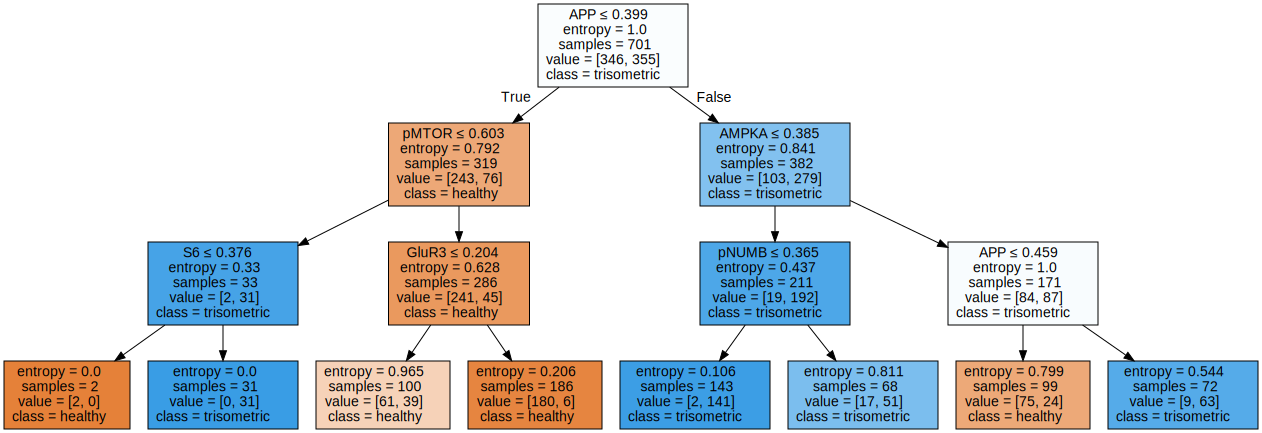

In [ ]:
graph = graphviz.Source(dot_data)
graph.render("tree.dot")
graph


### Task (iii)
#### Classify the instances of the test data using your decision tree

In [ ]:

predicated=classifier.predict(x_test)
print('Predicated results')
print(predicated)
print('-'*40)
accuracy=accuracy_score(predicated,y_test)
print("Accuracy: {}".format(accuracy))


Predicated results
[0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1

## 2.1 Examine overfitting

#### 2.1.1

Calculate accuracy function

In [ ]:
def calculate_accuracy(classifier,x,y):
    predicated=classifier.predict(x)
    print('-'*40)
    accuracy=accuracy_score(predicated,y)
    print("Accuracy: {}".format(accuracy))

Construct decision tree function

In [ ]:
def construct_decision_tree(x,y,max_depth):
    classifier = DTC(criterion='entropy', max_depth=max_depth)
    classifier = classifier.fit(x,y)
    return classifier

1. Measure the accuracy of your previously constructed decision tree on the training
data as well (i.e., repeat the 4-th step of the task described in Section , but use
the training data instead of the test data)

In [ ]:
calculate_accuracy(classifier=classifier,x=x_train,y=y_train)

----------------------------------------
Accuracy: 0.8616262482168331


#### 2.1.2


Construct two other decision trees with (maximally) 5 and 10 levels

In [ ]:
decision_tree_5=construct_decision_tree(x_train,y_train,5)
decision_tree_10=construct_decision_tree(x_train,y_train,10)

Measure their performance both on the training data and test data.

In [ ]:

#Testing classifier using the testing data
calculate_accuracy(decision_tree_5,x_test,y_test)
calculate_accuracy(decision_tree_10,x_test,y_test)
#Testing classifier using the training data
calculate_accuracy(decision_tree_5,x_train,y_train)
calculate_accuracy(decision_tree_10,x_train,y_train)

----------------------------------------
Accuracy: 0.8901734104046243
----------------------------------------
Accuracy: 0.9046242774566474
----------------------------------------
Accuracy: 0.9386590584878745
----------------------------------------
Accuracy: 1.0


#### 2.1.3
Do you observe overfitting?

Yes by increasing the decison tree max level the accuracy increased also by using the traing data for tesing the accurcy increases.
In deccion tree with 10 level and using the training data for testing the classifier we can see the accurcy is 100%.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8d525717-702e-4285-81d5-cd5945dff109' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>